In [183]:
import warnings
warnings.filterwarnings('ignore')

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

# Анализ данных

In [185]:
bmw_data = pd.read_csv("../data/bmw_encoded.csv")
bmw_data

,Серия,Поколение,Год,Рестайлинг,Пробег,Коробка,Объем,Цена,Кузов_внедорожник 5 дв.,Кузов_кабриолет,Кузов_купе,Кузов_лифтбек,Кузов_минивэн,Кузов_седан,Кузов_универсал,Кузов_хэтчбек 3 дв.,Кузов_хэтчбек 5 дв.,Топливо_бензин,Топливо_дизель
0,17140,22517,2019,0,129000,1,1.5,16999,0,0,0,0,0,0,0,0,1,0,1
1,20542,40126,2019,1,35000,2,3.0,83777,0,0,0,0,0,1,0,0,0,0,1
2,17574,7029,1999,0,400000,0,2.5,3399,0,0,0,0,0,1,0,0,0,0,1
3,17681,13564,2005,0,370000,2,2.0,7200,0,0,0,0,0,0,0,0,1,1,0
4,39427,21047,2012,1,149000,2,3.0,23450,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,15881,36993,2022,1,8540,2,3.0,59990,0,0,0,0,0,1,0,0,0,1,0
2609,38714,21047,2011,0,277000,2,3.0,22290,1,0,0,0,0,0,0,0,0,0,1
2610,17574,20410,2012,0,256000,2,3.0,23500,0,0,0,0,0,1,0,0,0,0,1
2611,38991,26413,2013,0,268500,2,2.0,21500,0,0,1,0,0,0,0,0,0,1,0


In [186]:
bmw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Серия                    2613 non-null   int64  
 1   Поколение                2613 non-null   int64  
 2   Год                      2613 non-null   int64  
 3   Рестайлинг               2613 non-null   int64  
 4   Пробег                   2613 non-null   int64  
 5   Коробка                  2613 non-null   int64  
 6   Объем                    2613 non-null   float64
 7   Цена                     2613 non-null   int64  
 8   Кузов_внедорожник 5 дв.  2613 non-null   int64  
 9   Кузов_кабриолет          2613 non-null   int64  
 10  Кузов_купе               2613 non-null   int64  
 11  Кузов_лифтбек            2613 non-null   int64  
 12  Кузов_минивэн            2613 non-null   int64  
 13  Кузов_седан              2613 non-null   int64  
 14  Кузов_универсал         

,Серия,Поколение,Объем,Год
Серия,1.000000,0.639916,0.297926,0.372197
Поколение,0.639916,1.000000,0.138139,0.769333
Объем,0.297926,0.138139,1.000000,-0.153404
Год,0.372197,0.769333,-0.153404,1.000000


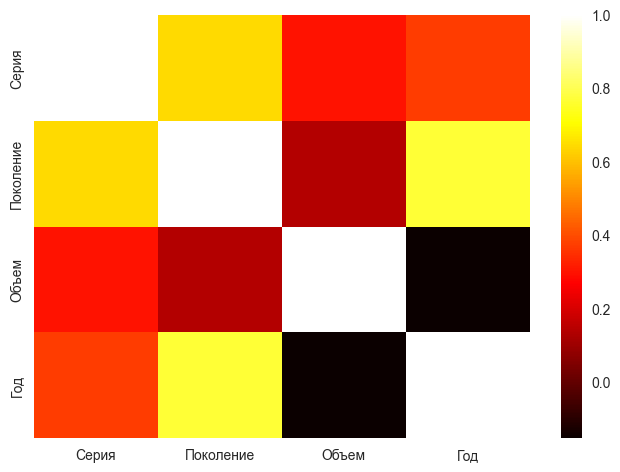

In [187]:
corr_bmw = bmw_data[["Серия", "Поколение", "Объем", "Год"]].corr()
sns.heatmap(corr_bmw, cmap="hot")
corr_bmw

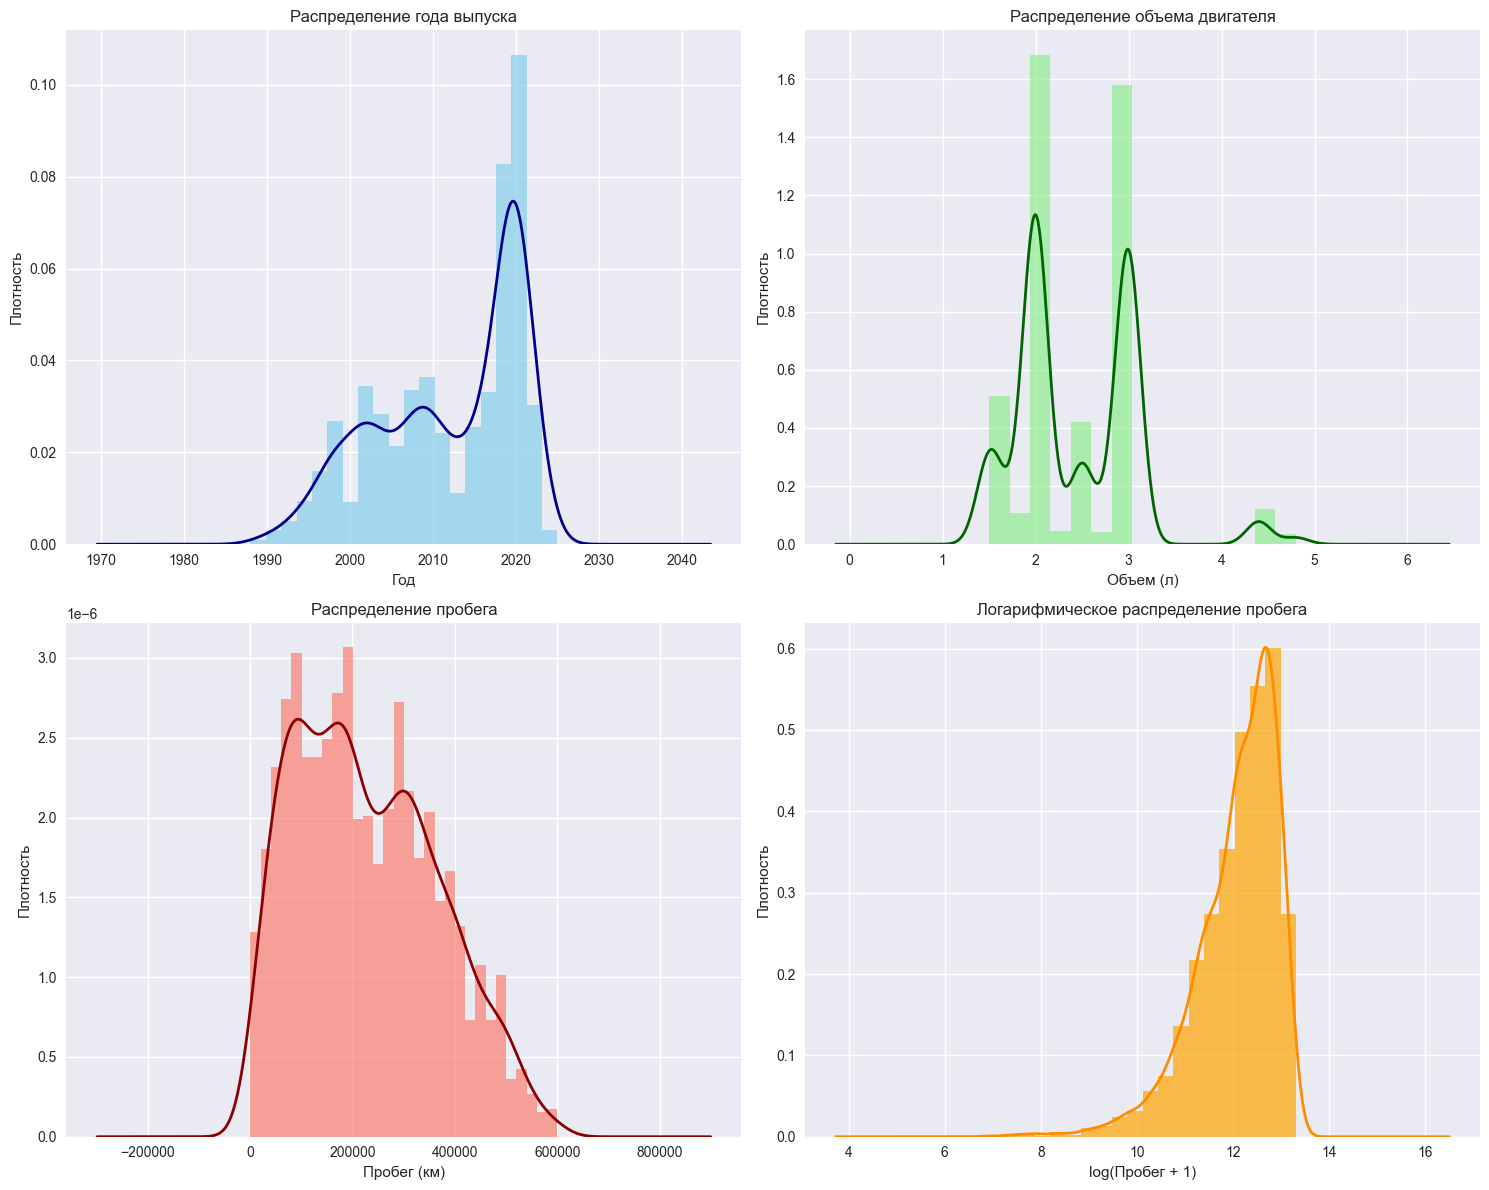

In [188]:
# Настройка стиля
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Год выпуска
axes[0,0].hist(bmw_data['Год'], bins=20, alpha=0.7, density=True, color='skyblue')
bmw_data['Год'].plot(kind='kde', ax=axes[0,0], color='darkblue', linewidth=2)
axes[0,0].set_title('Распределение года выпуска')
axes[0,0].set_xlabel('Год')
axes[0,0].set_ylabel('Плотность')

# Объем двигателя
axes[0,1].hist(bmw_data['Объем'], bins=15, alpha=0.7, density=True, color='lightgreen')
bmw_data['Объем'].plot(kind='kde', ax=axes[0,1], color='darkgreen', linewidth=2)
axes[0,1].set_title('Распределение объема двигателя')
axes[0,1].set_xlabel('Объем (л)')
axes[0,1].set_ylabel('Плотность')

# Пробег
axes[1,0].hist(bmw_data['Пробег'], bins=30, alpha=0.7, density=True, color='salmon')
bmw_data['Пробег'].plot(kind='kde', ax=axes[1,0], color='darkred', linewidth=2)
axes[1,0].set_title('Распределение пробега')
axes[1,0].set_xlabel('Пробег (км)')
axes[1,0].set_ylabel('Плотность')

# Логарифмированная версия пробега (если нужно)
axes[1,1].hist(np.log1p(bmw_data['Пробег']), bins=20, alpha=0.7, density=True, color='orange')
np.log1p(bmw_data['Пробег']).plot(kind='kde', ax=axes[1,1], color='darkorange', linewidth=2)
axes[1,1].set_title('Логарифмическое распределение пробега')
axes[1,1].set_xlabel('log(Пробег + 1)')
axes[1,1].set_ylabel('Плотность')

plt.tight_layout()
plt.show()

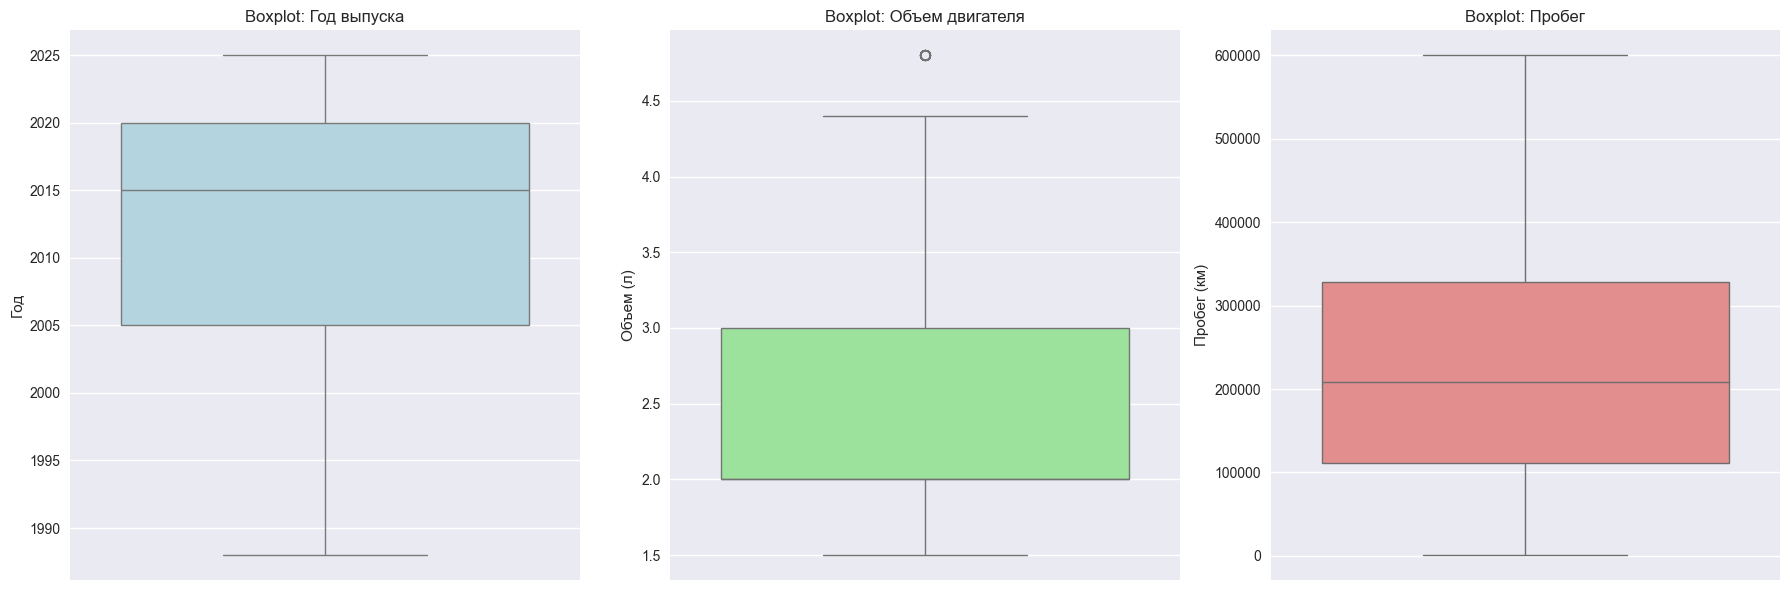

In [189]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot для года выпуска
sns.boxplot(y=bmw_data['Год'], ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot: Год выпуска')
axes[0].set_ylabel('Год')

# Boxplot для объема двигателя
sns.boxplot(y=bmw_data['Объем'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot: Объем двигателя')
axes[1].set_ylabel('Объем (л)')

# Boxplot для пробега
sns.boxplot(y=bmw_data['Пробег'], ax=axes[2], color='lightcoral')
axes[2].set_title('Boxplot: Пробег')
axes[2].set_ylabel('Пробег (км)')

plt.tight_layout()
plt.show()

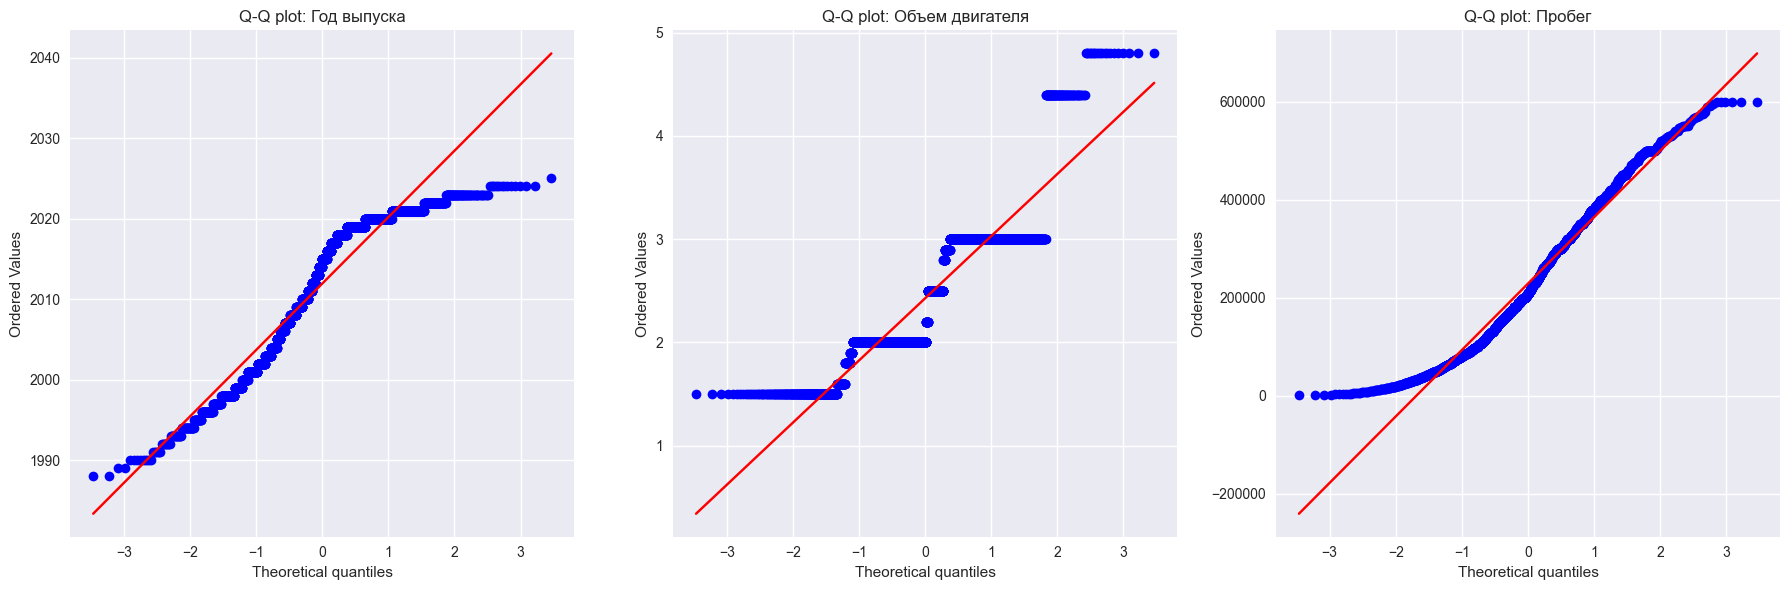

In [190]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Q-Q plot для года выпуска
stats.probplot(bmw_data['Год'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q plot: Год выпуска')

# Q-Q plot для объема двигателя
stats.probplot(bmw_data['Объем'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q plot: Объем двигателя')

# Q-Q plot для пробега
stats.probplot(bmw_data['Пробег'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q plot: Пробег')

plt.tight_layout()
plt.show()

## Конспект-теория

| Понятие       | Делит на | Уровни | Пример |
|---------------|----------|---------|---------|
| **Перцентиль** | 100 частей | 0-100% | 90-й перцентиль |
| **Квантиль**  | n частей | 0-1 | Квантиль 0.9 |
| **Квартиль**  | 4 части | Q1, Q2, Q3 | Q3 = 75-й перцентиль |

### Q-Q plot

`Q-Q plot` — это график, который показывает, как распределение данных соотносится с нормальным распределением.
- [Статья на хабре с доп. источниками для понимания этого графика](https://habr.com/ru/articles/578754)
- . . .

# Предобработка данных

## Шкалирование данных

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features_idx = [0,1,2,4] # Серия, Поколение, Год, Пробег

X_scaler = StandardScaler()
X_train_scaled = X_train[:].copy()
X_train_scaled[numeric_features_idx] = X_scaler.fit_transform(X_train[numeric_features_idx])
X_test_scaled = X_test[:].copy()
X_test_scaled[numeric_features_idx] = X_scaler.transform(X_test[numeric_features_idx])

y_scaler = StandardScaler()
y_train_scaled = y_train[:].copy()
y_train_scaled= y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = y_test[:].copy()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

In [192]:
X_scaled = np.vstack((X_train_scaled, X_test_scaled))
print(X_scaled.shape, X.shape)

y_scaled = np.hstack((y_train_scaled, y_test_scaled))
print(y_scaled.shape, y.shape)

(2613, 18) (2613, 18)
(2613,) (2613,)


In [193]:
y_test[0], y_scaler.inverse_transform([[y_test_scaled[0]]]).ravel()[0], y_test_scaled[0]

(np.int64(92000), np.float64(92000.0), np.float64(2.956388032851558))

In [194]:
poly_ft = PolynomialFeatures(degree=2)
X_train_feat = poly_ft.fit_transform(X_train_scaled)
X_test_feat = poly_ft.fit_transform(X_test_scaled)
X_test_scaled.shape, X_test_feat.shape

((523, 18), (523, 190))

# Модели

## Линейная регрессия

In [195]:
X = bmw_data.drop(["Цена"], axis=1).values
y = bmw_data["Цена"].values

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [197]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.856427806897845

In [198]:
poly_ft = PolynomialFeatures(degree=2)
X_poly = poly_ft.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=41)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9388561451692249

In [199]:
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.85541407, 0.88647776, 0.87270761, 0.86596928, 0.90547152])

In [200]:
model.predict(X_test[100:120]) - y_test[100:120]

array([ 1505.23030533,  -661.16493913,  1758.55239168,  1873.30619402,
       -1463.77407519,  2294.9769783 ,   809.92097135,   583.25801845,
        2631.76986328, -2103.06286333,  7194.54633623, -4545.43105093,
        7165.66564792, -3615.77677601,   272.12996986, -1164.40191711,
        1930.82039641,  2533.69151743,  2498.63620903,  2597.59213793])

In [201]:
model = LinearRegression()
cross_val_score(model, X_scaled, y_scaled).mean(), cross_val_score(model, X, y).mean()

(np.float64(0.8673099820096809), np.float64(0.8772080467430918))

## Дерево решений

In [202]:
X = bmw_data.drop(["Цена"], axis=1).values
y = bmw_data["Цена"].values

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [204]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9050908858477813

In [205]:
poly_ft = PolynomialFeatures(degree=2)
X_poly = poly_ft.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=41)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9205728683426322

In [206]:
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.93517207, 0.87931096, 0.91848744, 0.9133309 , 0.91715614])

In [207]:
model.predict(X_test[100:120]) - y_test[100:120]

array([ -8900.,  -2300.,   3049.,    800.,    500.,  12300.,   1000.,
         8730.,   3500.,  -1600.,   6300.,  -4500., -12499., -10600.,
         4800.,    800.,   9901.,   -250.,  -3200.,   4723.])

In [208]:
np.array((model.predict(X_test[100:120]), y_test[100:120])).T

array([[39900., 48800.],
       [ 3500.,  5800.],
       [46999., 43950.],
       [ 5000.,  4200.],
       [ 6500.,  6000.],
       [34000., 21700.],
       [ 5500.,  4500.],
       [27700., 18970.],
       [16000., 12500.],
       [11300., 12900.],
       [59300., 53000.],
       [33500., 38000.],
       [60500., 72999.],
       [38900., 49500.],
       [19800., 15000.],
       [24300., 23500.],
       [49900., 39999.],
       [18750., 19000.],
       [ 6800., 10000.],
       [48500., 43777.]])

## Градиентный бустинг (`sklearn`)

In [209]:
model = GradientBoostingRegressor(
    n_estimators=150,
    learning_rate=0.15,
    max_depth=4,
    random_state=43
)

cross_val_score(model, X, y)

array([0.9517541 , 0.94728605, 0.95611128, 0.93158931, 0.92788293])

In [210]:
model.fit(X_train, y_train)
model.score(X_test, y_test) 

0.9459303653690944

Text(0.5, 1.0, 'Distribution of residuals')

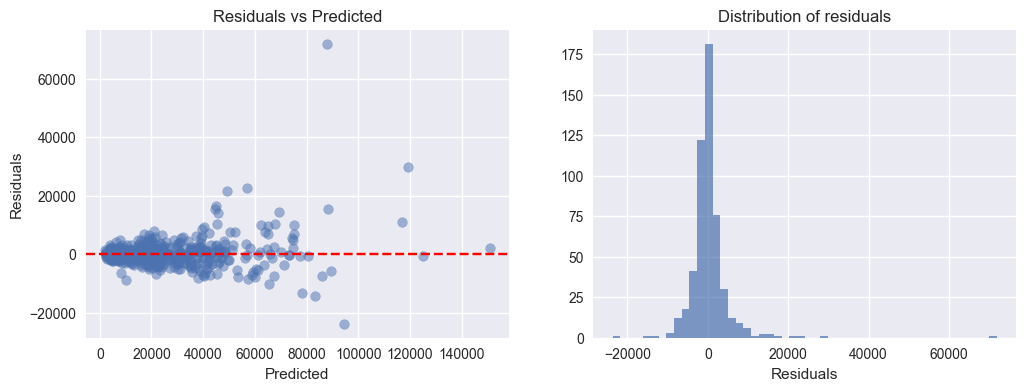

In [211]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(122)
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel('Residuals')
plt.title('Distribution of residuals')

In [212]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 500]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [214]:
model = grid_search.best_estimator_
model.score(X_test, y_test)

0.9417611917323783

Text(0.5, 1.0, 'Distribution of residuals')

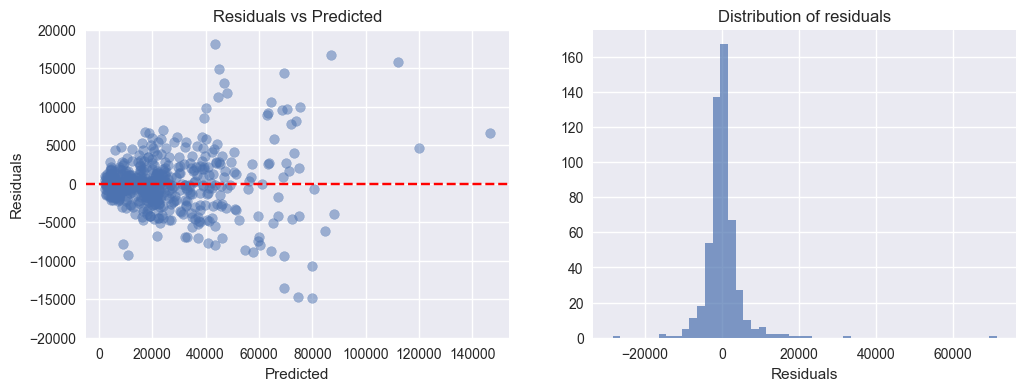

In [219]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.ylim(bottom=-20_000,top=20_000)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(122)
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel('Residuals')
plt.title('Distribution of residuals')